## Bike Sharing Assignment
#### Batch ID : 4705
#### Name : Archishman Gantait

## Data understanding, preparation and EDA

In [285]:
#importing few libraries to read and understand data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [286]:
# reading the data
bike_share = pd.read_csv('C:/Users/agantait/Downloads/Bike_Sharing_assignment/day.csv')
bike_share.head()

# temp ---------> temperature in Celsius
# atemp --------> feeling temperature in Celsius
# hum ----------> humidity
# windspeed ----> wind speed
# casual -------> count of casual users
# registered ---> count of registered users
# cnt ----------> count of total rental bikes including both casual and registered -----> dependent variable / target variable

# instant ------> record index
# season -------> season (1:spring, 2:summer, 3:fall, 4:winter)
# yr -----------> year (0: 2018, 1:2019)
# month --------> month ( 1 to 12)
# holiday ------> weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
# weekday ------> day of the week
# workingday ---> if day is neither weekend nor holiday is 1, otherwise is 0.
# weathersit ---> 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
#                 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
#                 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
#                 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# dteday -------> date

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [287]:
bike_share.shape

(730, 16)

In [288]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [289]:
# converting the date column to a propoer format
bike_share['dteday'] = pd.to_datetime(bike_share['dteday'], format="%d-%m-%Y")

In [174]:
bike_share.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018-12-31 12:00:00,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
min,1.000000,2018-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018-07-02 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018-12-31 12:00:00,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647


### Dropping Columns that are non contineous / non categorical

In [290]:
bike_share = bike_share.drop(['instant', 'casual' , 'registered'], axis=1)

### Converting categorical variables into proper labels to exclude them from pairplot and reduce run time

In [291]:
bike_share['season'] = bike_share['season'].map( {1: 'Spring', 2: 'Summer' , 3: 'Fall', 4: 'Winter'} )

bike_share['mnth'] = bike_share['mnth'].map({1: 'Jan' , 2: 'Feb', 3: 'Mar' , 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul' , 8: 'Aug',  9: 'Sep', 10: 'Oct', 11: 'Nov' , 12: 'Dec'})

bike_share['weekday'] = bike_share['weekday'].map( {0: 'Sun' , 1: 'Mon' , 2: 'Tue', 3: 'Wed' , 4: 'Thu', 5: 'Fri' , 6: 'Sat'})

bike_share['weathersit'] =  bike_share['weathersit'].map( {1: 'Clear' , 2: 'Mist + Cloudy' , 3: 'Light Snow + Rain' , 4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})


In [292]:
print(bike_share.groupby([ 'season' , 'mnth' , 'weekday'  , 'weathersit' ]).size())

season  mnth  weekday  weathersit   
Fall    Aug   Fri      Clear            5
                       Mist + Cloudy    4
              Mon      Clear            7
                       Mist + Cloudy    2
              Sat      Clear            3
                                       ..
Winter  Sep   Thu      Mist + Cloudy    1
              Tue      Clear            1
                       Mist + Cloudy    1
              Wed      Clear            1
                       Mist + Cloudy    1
Length: 232, dtype: int64


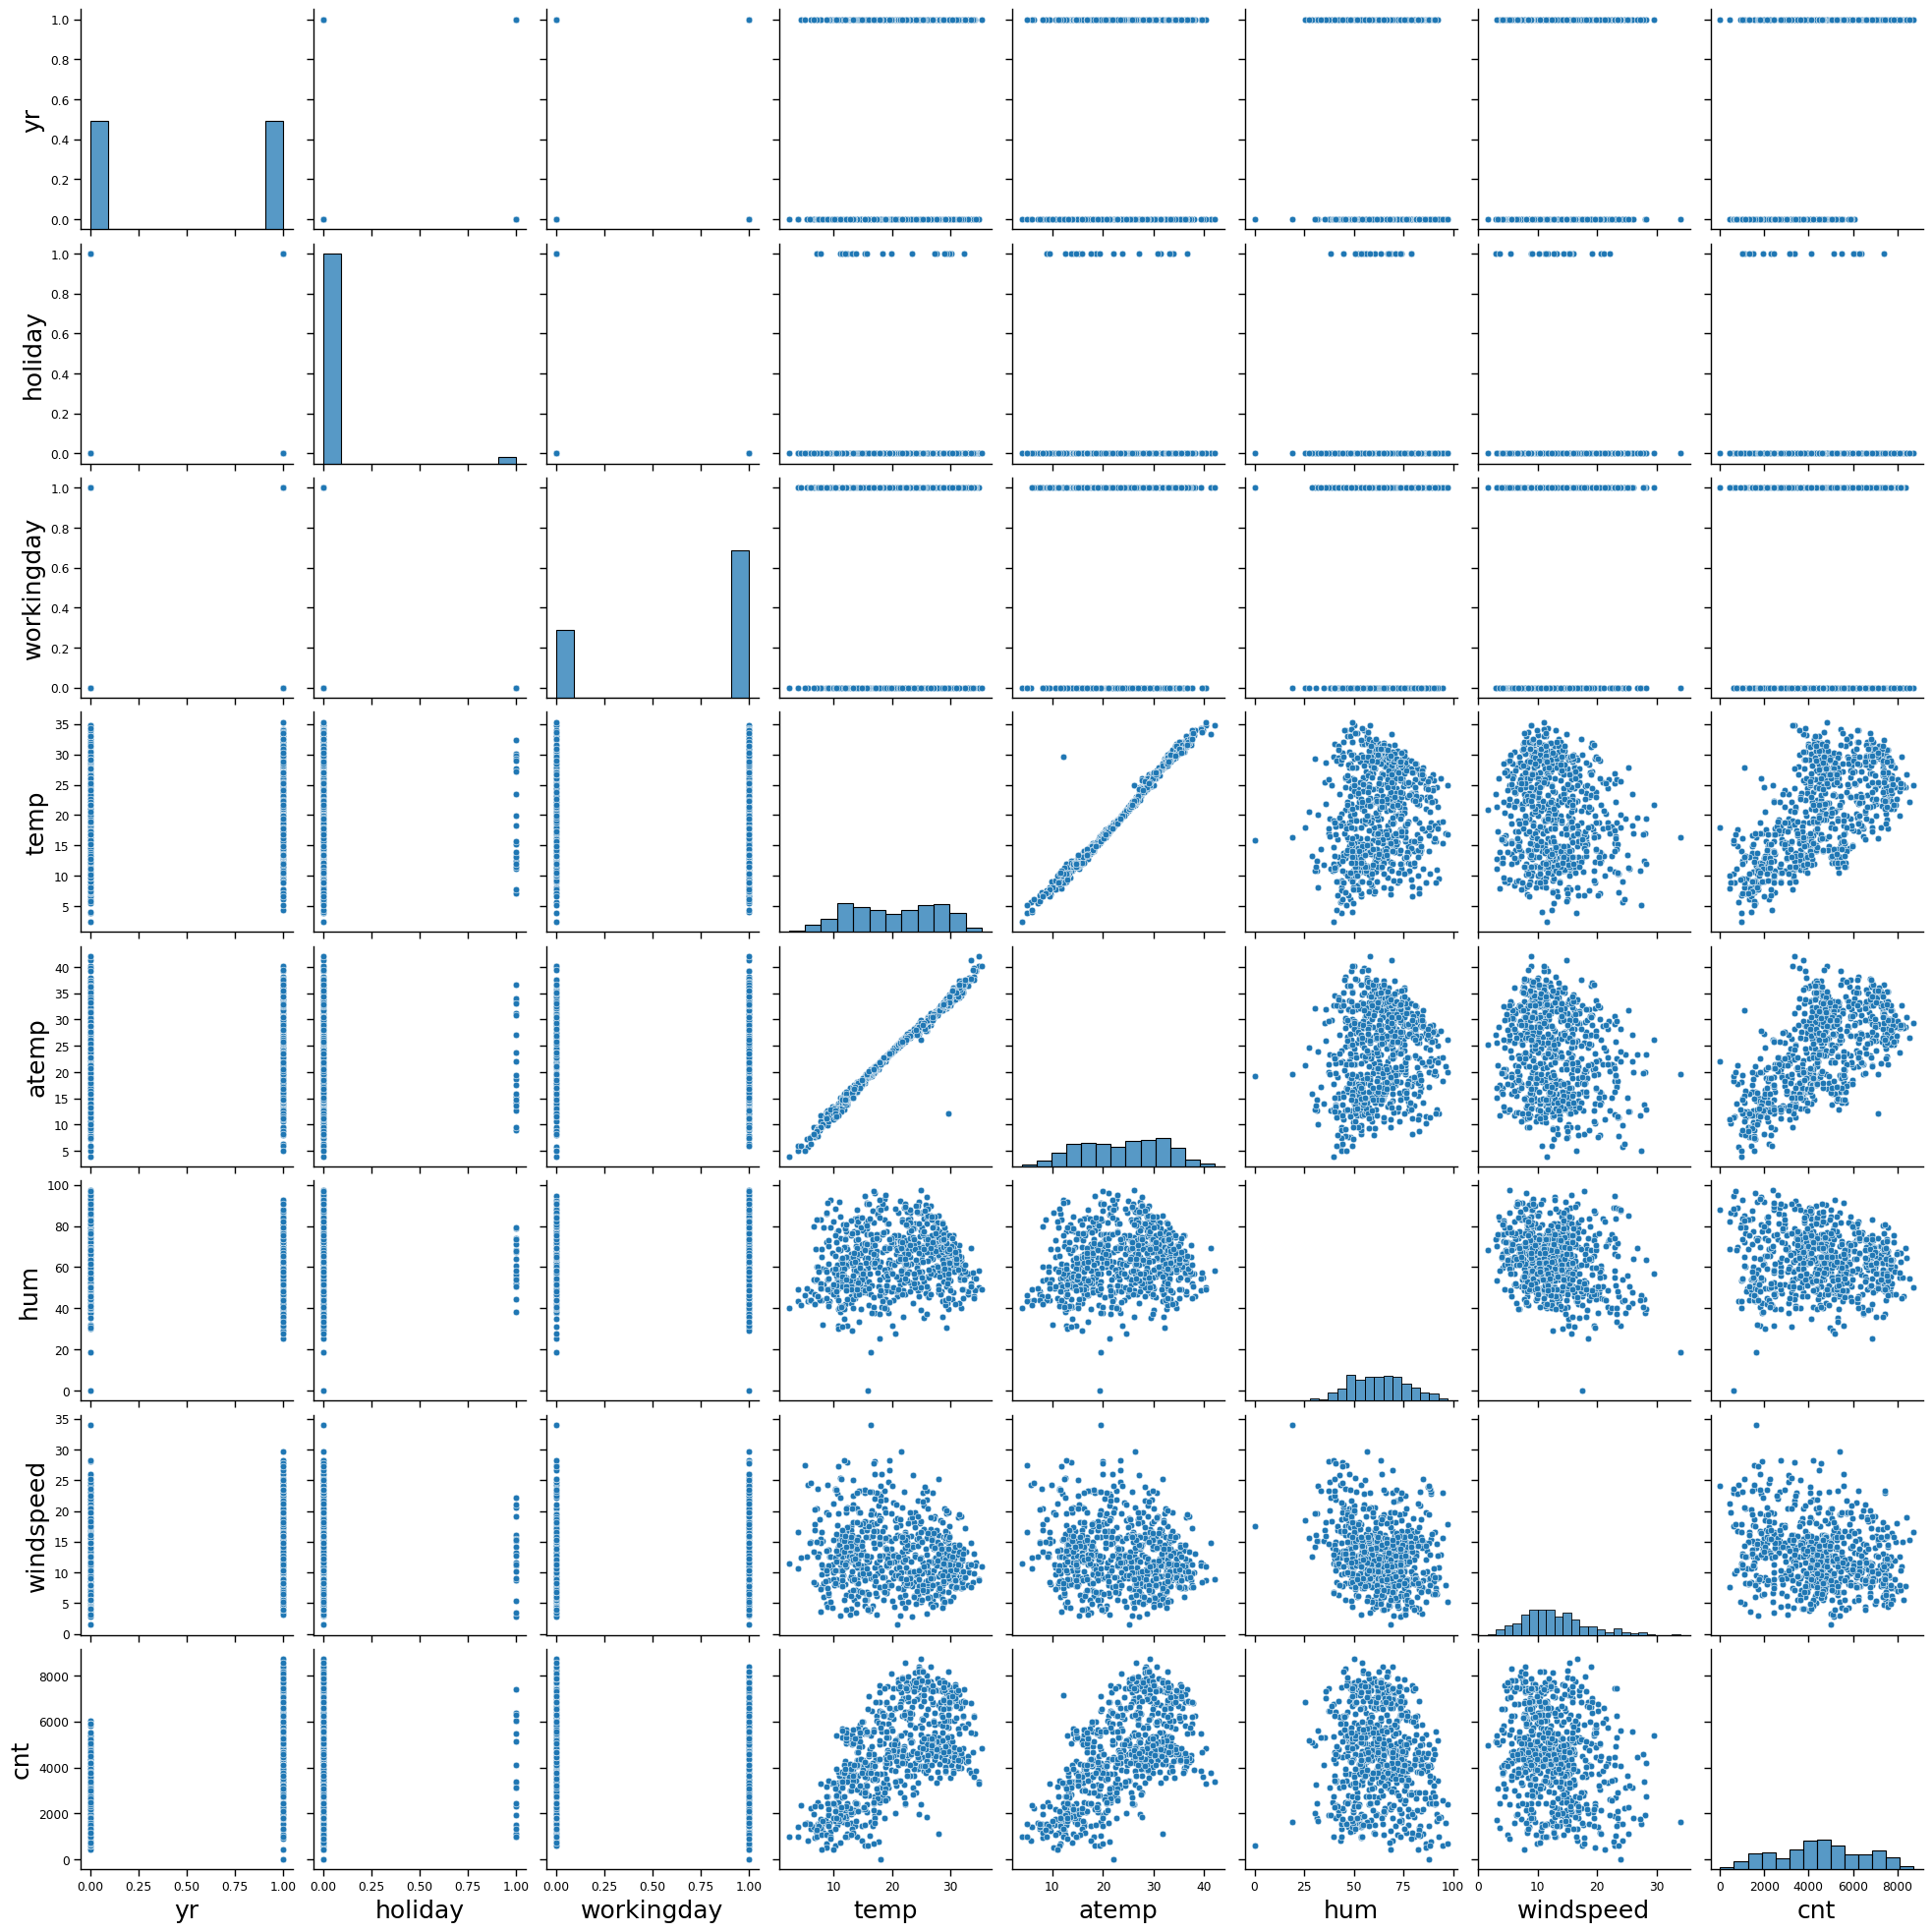

In [293]:
sns.set_context("paper", rc={"axes.labelsize":18})
sns.pairplot(bike_share)
plt.show()

### Using boxplot for categorical variables

<Axes: xlabel='holiday', ylabel='cnt'>

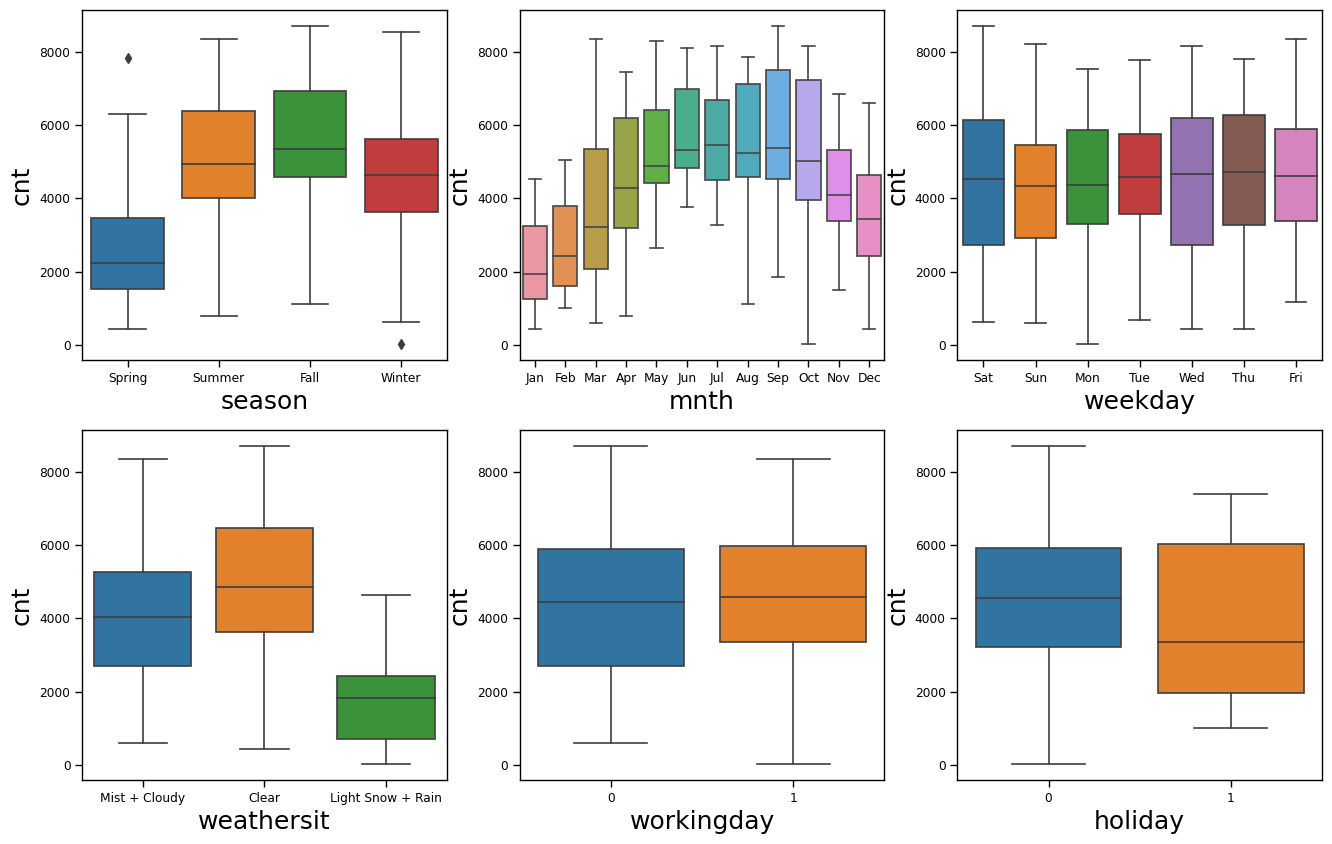

In [294]:
plt.figure(figsize=(16, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season' , y = 'cnt' , data = bike_share )
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth' , y = 'cnt' , data = bike_share )
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday' , y = 'cnt' , data = bike_share )
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit' , y = 'cnt' , data = bike_share )
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday' , y = 'cnt' , data = bike_share )
plt.subplot(2,3,6)
sns.boxplot(x = 'holiday' , y = 'cnt' , data = bike_share )

### Based on Pair Plot and Box Plot below can be considered as part of encoding
#### workingday / holiday ------------------------> binary categorical , already in format of 0 and 1 , no change required
#### season / mnth / weekday / weathersit -----> categorical varaibles with more than 2 category , hence dummy variable needed , post which binary values to be converted to 0 and 1

In [295]:
# Dummy variable creation and converting the binary categorial output to 0 and 1 i.e integer
season_d = pd.get_dummies(bike_share['season'], prefix ='season' , drop_first=True, dtype=np.int64)
bike_share = pd.concat([bike_share , season_d ],axis =1)
bike_share = bike_share.drop('season' , axis = 1)

mnth_d = pd.get_dummies(bike_share['mnth'], prefix ='mnth' , drop_first=True, dtype=np.int64)
bike_share = pd.concat([bike_share , mnth_d ],axis =1)
bike_share = bike_share.drop('mnth' , axis = 1)

weekday_d = pd.get_dummies(bike_share['weekday'], prefix ='weekday' , drop_first=True, dtype=np.int64)
bike_share = pd.concat([bike_share , weekday_d ],axis =1)
bike_share = bike_share.drop('weekday' , axis = 1)

weathersit_d = pd.get_dummies(bike_share['weathersit'], prefix ='weathersit' , drop_first=True, dtype=np.int64)
bike_share = pd.concat([bike_share , weathersit_d ],axis =1)
bike_share = bike_share.drop('weathersit' , axis = 1)

In [296]:
bike_share.info()
# no null values found , so no impute needed on te column values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   dteday                        730 non-null    datetime64[ns]
 1   yr                            730 non-null    int64         
 2   holiday                       730 non-null    int64         
 3   workingday                    730 non-null    int64         
 4   temp                          730 non-null    float64       
 5   atemp                         730 non-null    float64       
 6   hum                           730 non-null    float64       
 7   windspeed                     730 non-null    float64       
 8   cnt                           730 non-null    int64         
 9   season_Spring                 730 non-null    int64         
 10  season_Summer                 730 non-null    int64         
 11  season_Winter                 73

In [297]:
pd.set_option('display.max_columns', None)
bike_share.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow + Rain,weathersit_Mist + Cloudy
0,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2018-01-02,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,2018-01-03,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2018-01-04,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2018-01-05,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Scaling and Test Train Split

In [668]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  

## will use MinMaxscaler as it can reduce impact of outliers

In [669]:
## splitting into test train
df_train , df_test = train_test_split (bike_share , train_size=0.7, random_state=100)

In [670]:
print (df_train.shape)

(510, 31)


In [671]:
print (df_test.shape)

(220, 31)


In [672]:
scaler = MinMaxScaler()

In [673]:
# selecting numeric variables to scale in range 0 to 1 , this will also 
num_vars = ['temp' , 'atemp' , 'hum' , 'windspeed' , 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train = df_train.drop('dteday', axis=1)
df_train.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow + Rain,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training the Model

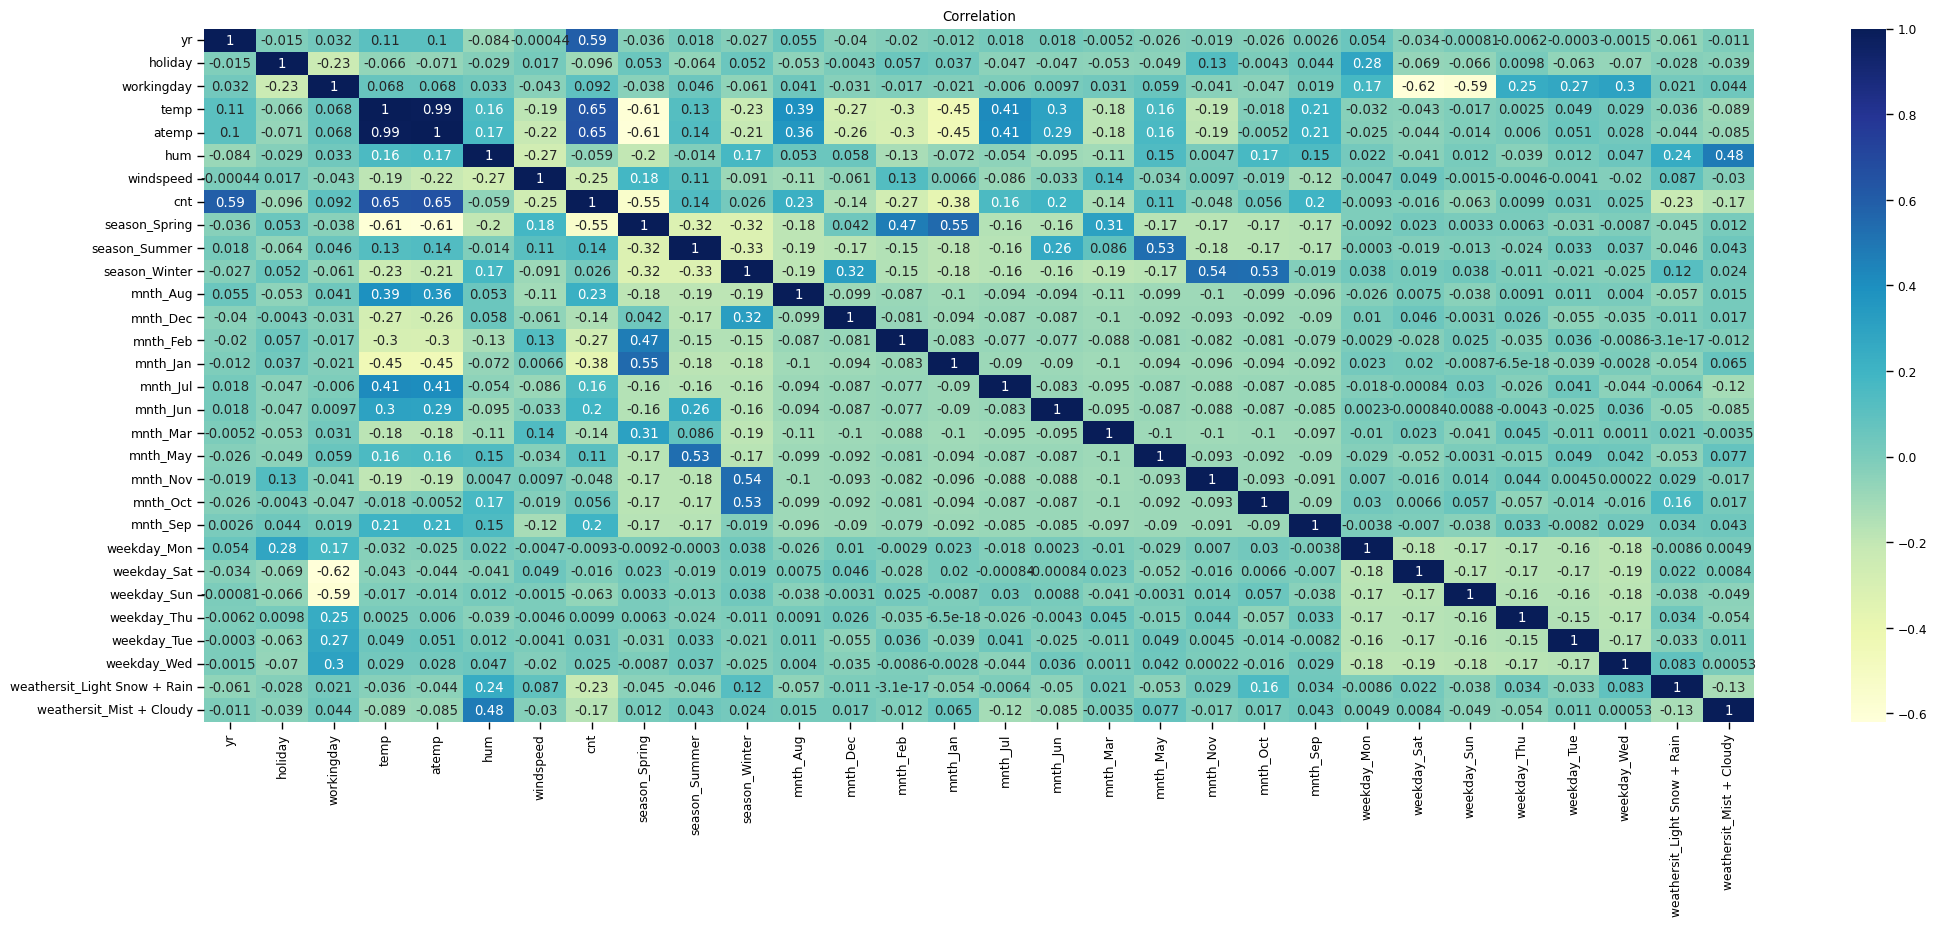

In [674]:
## generating heatmap to understand which variable is strongly corelated to cnt (target variable)

plt.figure(figsize=(25, 9))
sns.heatmap(df_train.corr(), annot = True , cmap = 'YlGnBu')
plt.title('Correlation')
plt.show()

In [675]:
y_train = df_train.pop ('cnt')
x_train = df_train

In [676]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [677]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow + Rain,weathersit_Mist + Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [678]:
import statsmodels.api as sm

In [679]:
# adding a constant as by default stats model don't add intercept
x_train_sm = sm.add_constant(x_train)

In [680]:
lr = sm.OLS(y_train , x_train_sm)
lr_model = lr.fit()
lr_model.params

const                           0.243298
yr                              0.232539
holiday                         0.010892
workingday                      0.096273
temp                            0.387984
atemp                           0.059045
hum                            -0.152016
windspeed                      -0.183604
season_Spring                  -0.045355
season_Summer                   0.042369
season_Winter                   0.107081
mnth_Aug                        0.022270
mnth_Dec                       -0.044274
mnth_Feb                       -0.032316
mnth_Jan                       -0.063064
mnth_Jul                       -0.032657
mnth_Jun                        0.006012
mnth_Mar                        0.001555
mnth_May                        0.025541
mnth_Nov                       -0.039818
mnth_Oct                        0.007713
mnth_Sep                        0.086761
weekday_Mon                    -0.021624
weekday_Sat                     0.095176
weekday_Sun     

In [681]:
lr_model.summary()
# we can explain 85% of data using all variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          2.81e-180
Time:                        20:21:24   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2433      0.035      6.887      0.000       0.174       0.313
yr                               0.2325      0.008     28.794      0.000       0.217       0.248
holiday                          0.0109      0.024      0.451      0.652      -0.037       0.058
workingday                       0.0963      0.012      7.835      0.000       0.072       0.120
temp                             0.3880      0.142      2.727      0.007       0.108       0.668
atemp                            0.0590      0.138      0.426      0.670      -0.213       0.331
hum                             -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                       -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season_Spring                   -0.0454      0.030     -1.511      0.131      -0.104       0.014
season_Summer                    0.0424      0.026      1.617      0.107      -0.009       0.094
season_Winter                    0.1071      0.028      3.826      0.000       0.052       0.162
mnth_Aug                         0.0223      0.034      0.657      0.511      -0.044       0.089
mnth_Dec                        -0.0443      0.034     -1.316      0.189      -0.110       0.022
mnth_Feb                        -0.0323      0.033     -0.980      0.327      -0.097       0.032
mnth_Jan                        -0.0631      0.034     -1.876      0.061      -0.129       0.003
mnth_Jul                        -0.0327      0.035     -0.931      0.352      -0.102       0.036
mnth_Jun                         0.0060      0.025      0.241      0.810      -0.043       0.055
mnth_Mar                         0.0016      0.025      0.063      0.950      -0.047       0.050
mnth_May                         0.0255      0.021      1.208      0.228      -0.016       0.067
mnth_Nov                        -0.0398      0.036     -1.093      0.275      -0.111       0.032
mnth_Oct                         0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_Sep                         0.0868      0.032      2.711      0.007       0.024       0.150
weekday_Mon                     -0.0216      0.015     -1.401      0.162      -0.052       0.009
weekday_Sat                      0.0952      0.014      6.910      0.000       0.068       0.122
weekday_Sun                      0.0410      0.014      2.929      0.004       0.013       0.068
weekday_Thu                     -0.0097      0.016     -0.623      0.534      -0.040       0.021
weekday_Tue                     -0.0184      0.016     -1.184      0.237      -0.049       0.012
weekday_Wed                     -0.0059      0.015     -0.394      0.694      -0.035       0.023
weathersit_Light Snow + Rain    -0.2550      0.026     -9.631      0.000    

In [682]:
# checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values , i) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF' , ascending = False)
vif

,Features,VIF
2,workingday,85.56
3,temp,66.90
4,atemp,56.03
22,weekday_Sat,19.71
23,weekday_Sun,18.34
7,season_Spring,10.77
9,season_Winter,9.46
8,season_Summer,8.29
18,mnth_Nov,6.79
10,mnth_Aug,6.47


In [ ]:
# based on matrix
# p (High) + vif (High) ----> drop it --> atemp , mnth_Aug , mnth_Jul  , mnth_Nov , mnth_Jan , mnth_Oct , mnth_Dec , season_Summer

    # p (High) + vif (low) -----> remove 1st --> mnth_Mar , mnth_Jun , weekday_Wed , holiday , weekday_Thu , weekday_Tue , mnth_May  , mnth_Feb , weekday_Mon , season_Spring 
    # p (Low) + vif (High) -----> remove 2nd --> temp , weekday_Sun , season_Winter , weekday_Sat  , mnth_Jan , workingday , mnth_Sep
    
# p (Low) + vif (High) -----> keep it ----> mnth_Sep , yr , hum , windspeed , weathersit_Light Snow + Rain , weathersit_Mist + Cloudy 

In [683]:
# creating another model -- atemp
x = x_train[['mnth_Sep' , 'yr' , 'hum' , 'windspeed' , 'weathersit_Light Snow + Rain' , 'weathersit_Mist + Cloudy' , 
             'temp' , 'weekday_Sun' , 'season_Winter' , 'weekday_Sat'  , 'mnth_Jan' , 'workingday' ]] 

In [684]:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train , x_train_sm)
lr_model = lr.fit()
lr_model.params

const                           0.157231
mnth_Sep                        0.076616
yr                              0.231429
hum                            -0.136000
windspeed                      -0.176564
weathersit_Light Snow + Rain   -0.254228
weathersit_Mist + Cloudy       -0.052112
temp                            0.531937
weekday_Sun                     0.062228
season_Winter                   0.095705
weekday_Sat                     0.116956
mnth_Jan                       -0.077698
workingday                      0.108600
dtype: float64

In [685]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.0
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          8.95e-179
Time:                        20:25:03   Log-Likelihood:                 482.05
No. Observations:                 510   AIC:                            -938.1
Df Residuals:                     497   BIC:                            -883.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1572      0.039      3.988      0.000       0.080       0.235
mnth_Sep                         0.0766      0.016      4.772      0.000       0.045       0.108
yr                               0.2314      0.009     27.012      0.000       0.215       0.248
hum                             -0.1360      0.040     -3.437      0.001      -0.214      -0.058
windspeed                       -0.1766      0.027     -6.521      0.000      -0.230      -0.123
weathersit_Light Snow + Rain    -0.2542      0.028     -9.139      0.000      -0.309      -0.200
weathersit_Mist + Cloudy        -0.0521      0.011     -4.708      0.000      -0.074      -0.030
temp                             0.5319      0.024     21.762      0.000       0.484       0.580
weekday_Sun                      0.0622      0.029      2.159      0.031       0.006       0.119
season_Winter                    0.0957      0.011      8.599      0.000       0.074       0.118
weekday_Sat                      0.1170      0.029      4.079      0.000       0.061       0.173
mnth_Jan                        -0.0777      0.018     -4.358      0.000      -0.113      -0.043
workingday                       0.1086      0.027      4.003      0.000       0.055       0.162
==============================================================================
Omnibus:                       48.313   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.208
Skew:                          -0.564   Prob(JB):                     2.12e-21
Kurtosis:                       4.791   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [686]:
# checking VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values , i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF' , ascending = False)
vif

,Features,VIF
2,hum,26.65
11,workingday,15.91
6,temp,10.81
9,weekday_Sat,4.33
3,windspeed,4.28
7,weekday_Sun,4.23
5,weathersit_Mist + Cloudy,2.21
1,yr,2.07
8,season_Winter,1.68
10,mnth_Jan,1.49


In [687]:
#as vif is high for hum , workingday , temp we can remove them but the r-squared is getting dropped significantly so we don't remove

x = x_train[['mnth_Sep' , 'yr' , 'windspeed' , 'weathersit_Light Snow + Rain' , 'weathersit_Mist + Cloudy' , 'weekday_Sun' , 'season_Winter' , 'weekday_Sat'  , 'mnth_Jan' ]]
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train , x_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     101.4
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          7.71e-107
Time:                        20:25:08   Log-Likelihood:                 303.81
No. Observations:                 510   AIC:                            -587.6
Df Residuals:                     500   BIC:                            -545.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.5363      0.017     32.449      0.000       0.504       0.569
mnth_Sep                         0.1263      0.022      5.665      0.000       0.082       0.170
yr                               0.2562      0.012     21.413      0.000       0.233       0.280
windspeed                       -0.2899      0.036     -8.093      0.000      -0.360      -0.220
weathersit_Light Snow + Rain    -0.2963      0.036     -8.191      0.000      -0.367      -0.225
weathersit_Mist + Cloudy        -0.0872      0.013     -6.856      0.000      -0.112      -0.062
weekday_Sun                     -0.0480      0.017     -2.763      0.006      -0.082      -0.014
season_Winter                   -0.0034      0.014     -0.238      0.812      -0.031       0.025
weekday_Sat                      0.0097      0.017      0.576      0.565      -0.023       0.043
mnth_Jan                        -0.2832      0.022    -13.140      0.000      -0.325      -0.241
==============================================================================
Omnibus:                       27.977   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.094
Skew:                          -0.594   Prob(JB):                     1.77e-07
Kurtosis:                       3.233   Cond. No.                         8.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [688]:
# checking VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values , i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF' , ascending = False)
vif

,Features,VIF
2,windspeed,2.29
1,yr,1.74
4,weathersit_Mist + Cloudy,1.46
6,season_Winter,1.30
7,weekday_Sat,1.20
5,weekday_Sun,1.17
8,mnth_Jan,1.12
3,weathersit_Light Snow + Rain,1.08
0,mnth_Sep,1.07


In [689]:
# restoring the significant predictor values that gave r squared of 82%
x = x_train[['mnth_Sep' , 'yr' , 'hum' , 'windspeed' , 'weathersit_Light Snow + Rain' , 'weathersit_Mist + Cloudy' , 
             'temp' , 'weekday_Sun' , 'season_Winter' , 'weekday_Sat'  , 'mnth_Jan' , 'workingday' ]]
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train , x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.0
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          8.95e-179
Time:                        20:25:18   Log-Likelihood:                 482.05
No. Observations:                 510   AIC:                            -938.1
Df Residuals:                     497   BIC:                            -883.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1572      0.039      3.988      0.000       0.080       0.235
mnth_Sep                         0.0766      0.016      4.772      0.000       0.045       0.108
yr                               0.2314      0.009     27.012      0.000       0.215       0.248
hum                             -0.1360      0.040     -3.437      0.001      -0.214      -0.058
windspeed                       -0.1766      0.027     -6.521      0.000      -0.230      -0.123
weathersit_Light Snow + Rain    -0.2542      0.028     -9.139      0.000      -0.309      -0.200
weathersit_Mist + Cloudy        -0.0521      0.011     -4.708      0.000      -0.074      -0.030
temp                             0.5319      0.024     21.762      0.000       0.484       0.580
weekday_Sun                      0.0622      0.029      2.159      0.031       0.006       0.119
season_Winter                    0.0957      0.011      8.599      0.000       0.074       0.118
weekday_Sat                      0.1170      0.029      4.079      0.000       0.061       0.173
mnth_Jan                        -0.0777      0.018     -4.358      0.000      -0.113      -0.043
workingday                       0.1086      0.027      4.003      0.000       0.055       0.162
==============================================================================
Omnibus:                       48.313   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.208
Skew:                          -0.564   Prob(JB):                     2.12e-21
Kurtosis:                       4.791   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual Analysis of Error Terms

<Axes: ylabel='Density'>

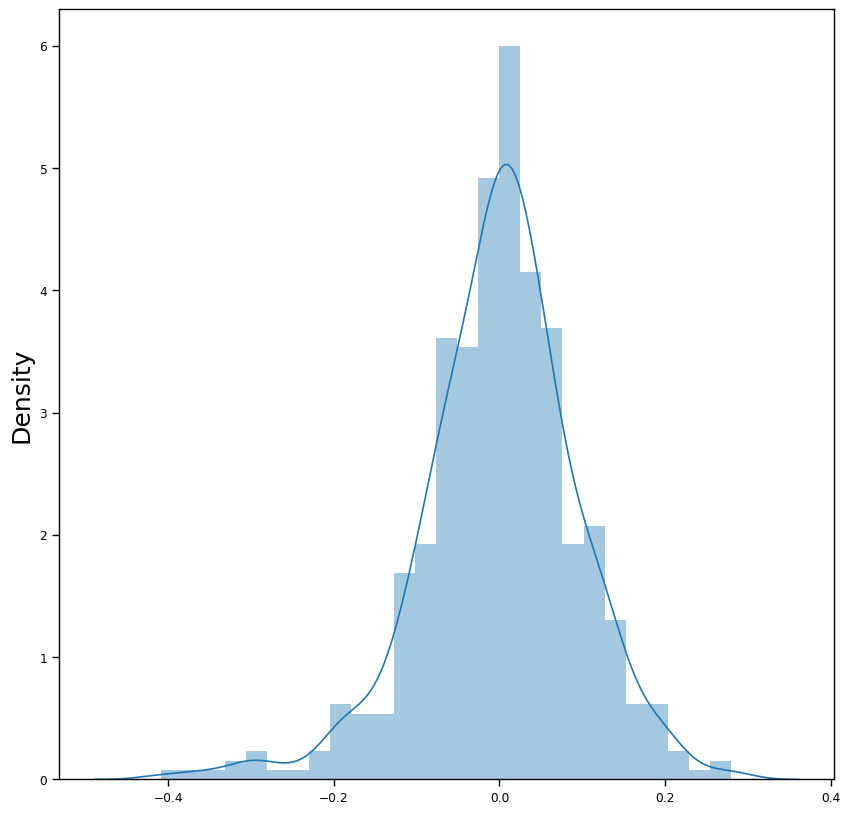

In [690]:
y_train_pred = lr_model.predict(x_train_sm)
res = y_train - y_train_pred
sns.distplot(res)

# distribution is centered around 0 which is good

### Predictions and Evaluation on the test set

In [691]:
num_vars = ['temp' , 'atemp' , 'hum' , 'windspeed' , 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test = df_test.drop('dteday', axis=1)
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow + Rain,weathersit_Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [692]:
df_test_bkp = df_test

In [693]:
df_test = df_test_bkp

In [694]:
x_train_sm

,const,mnth_Sep,yr,hum,windspeed,weathersit_Light Snow + Rain,weathersit_Mist + Cloudy,temp,weekday_Sun,season_Winter,weekday_Sat,mnth_Jan,workingday
576,1.0,0,1,0.725633,0.264686,0,0,0.815169,0,0,0,0,1
426,1.0,0,1,0.640189,0.255342,0,1,0.442393,0,0,1,0,0
728,1.0,0,1,0.498067,0.663106,0,0,0.245101,1,0,0,0,0
482,1.0,0,1,0.504508,0.188475,0,1,0.395666,0,0,1,0,0
111,1.0,0,0,0.751824,0.380981,0,1,0.345824,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,1,0.679690,0.187140,0,0,0.863973,0,0,0,0,1
53,1.0,0,0,0.435939,0.111379,0,0,0.202618,0,0,0,0,1
350,1.0,0,0,0.577930,0.431816,0,1,0.248216,0,1,1,0,0
79,1.0,0,0,0.759870,0.529881,0,1,0.462664,0,0,0,0,1


In [695]:

y_test = df_test.pop('cnt')
x_test = df_test
x_test_sm = sm.add_constant(x_test)


In [696]:
x_test_sm_g = x_test_sm

In [697]:
x_train_sm.columns

Index(['const', 'mnth_Sep', 'yr', 'hum', 'windspeed',
       'weathersit_Light Snow + Rain', 'weathersit_Mist + Cloudy', 'temp',
       'weekday_Sun', 'season_Winter', 'weekday_Sat', 'mnth_Jan',
       'workingday'],
      dtype='object')

In [702]:
x_test_sm=x_test_sm_g[['const', 'mnth_Sep', 'yr', 'hum', 'windspeed',
       'weathersit_Light Snow + Rain', 'weathersit_Mist + Cloudy', 'temp',
       'weekday_Sun', 'season_Winter', 'weekday_Sat', 'mnth_Jan',
       'workingday']]

In [703]:
y_test_pred = lr_model.predict(x_test_sm)

In [704]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_test_pred )

0.7796522106772672